In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('banned_book_data_combined_lists.csv')
print(df.head())

                                       publication author  \
0                   [ARABIC LANGUAGE CHARACTERS].     NaN   
1     [ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.    NaN   
2  [KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.     NaN   
3                    [KOREAN LANGUAGE CHARACTERS].    NaN   
4                   [KOREAN LANGUAGE CHARACTERS].     NaN   

                  date    year  month   day reason state_arc  
0  2019-12-18 00:00:00  2019.0   12.0  18.0    NaN        fl  
1  2021-09-09 00:00:00  2021.0    9.0   9.0    NaN        fl  
2  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  
3  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  
4  2021-02-25 00:00:00  2021.0    2.0  25.0    NaN        fl  


In [3]:
df.loc[~df['reason'].isnull(), :]

,publication,author,date,year,month,day,reason,state_arc
13012,11/22/63,"King, Stephen",2019-06-01 00:00:00,2019.0,6.0,1.0,p.211 - a drunk father beats his wife with a s...,mo
13013,#Murderfunding,"McNeil, Gretchen",2021-03-01 00:00:00,2021.0,3.0,1.0,"Somewhat gory in places, but nothing over the ...",mo
13014,#Murdertrending,"McNeil, Gretchen",2019-10-01 00:00:00,2019.0,10.0,1.0,This is a YA book. The ”president” has opened ...,mo
13015,1 Night Stand,"McCall, Amaleka",2016-10-01 00:00:00,2016.0,10.0,1.0,"child molestation, lots of child abuse, and ra...",mo
13016,"1,001 Ways to Motivate Yourself and Others","Kim, Sang H.",2021-09-01 00:00:00,2021.0,9.0,1.0,Clean,mo
...,...,...,...,...,...,...,...,...
55043,Letters to Penthouse,Editors of Penthouse Magazine,2022-04-21 00:00:00,2022.0,4.0,21.0,sexually explicit writing.,mt
55044,A complete Study Guide to Chemistry,"Mark C Kernion, MA and Joseph A Mascetta, M.S,...",2022-04-21 00:00:00,2022.0,4.0,21.0,Threat to security due to sensitive informatio...,mt
55045,The 33 strategies of war,Robert Greene,2022-04-21 00:00:00,2022.0,4.0,21.0,Threat to security due to the book is full of ...,mt
55046,Tattoo Bible,NaN,2022-04-21 00:00:00,2022.0,4.0,21.0,Promotes tattooing and has nudity,mt


In [4]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))
print(df.shape)
_= [print(a, b) for a,b in null_pct(df).items()]
df = df.rename(columns={'publication':'Title',
                        'author':'Author',
                        'date':'DateBan',
                        'state_arc':'State',
                        'reason':'Description'})
df['Country'] = 'USA'

(55278, 8)
publication 0.0
author 57.57
date 14.9
year 14.84
month 14.9
day 15.59
reason 45.31
state_arc 0.0


<Axes: xlabel='Title'>

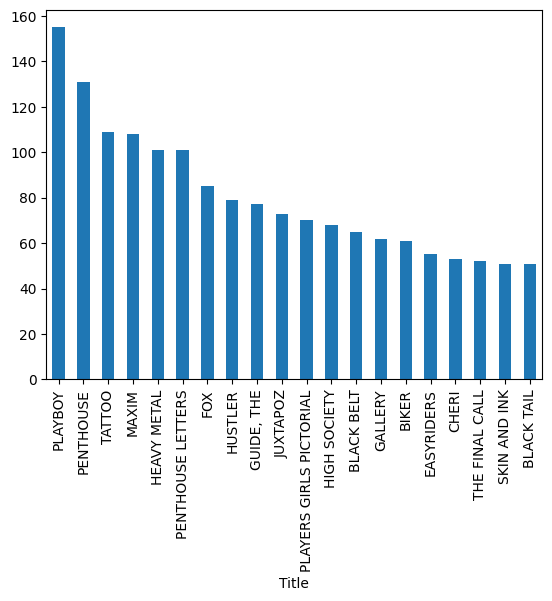

In [5]:
df.groupby('Title').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='Author'>

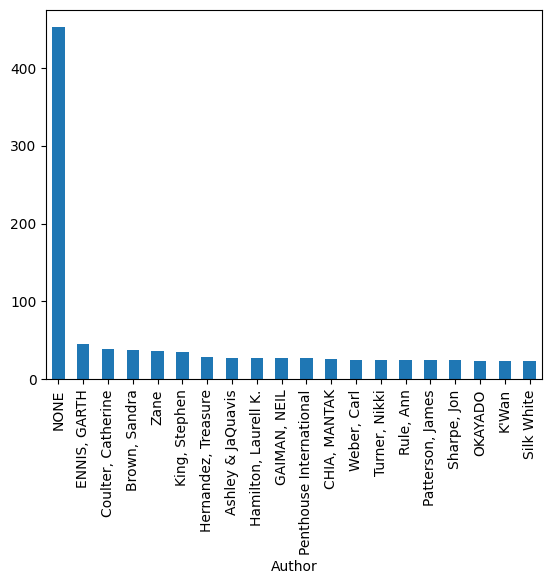

In [6]:
df.groupby('Author').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='State'>

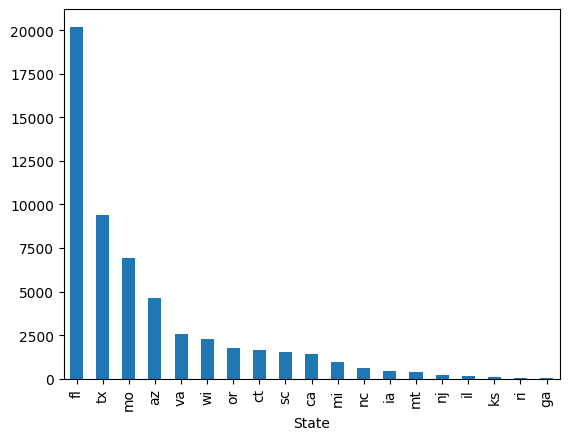

In [7]:
df.groupby('State').size().sort_values(ascending=False)[:20].plot.bar()

In [12]:
df.groupby('year').size()

year
1815.0       1
1816.0       1
1991.0       1
1992.0       5
1993.0       6
1994.0      17
1995.0      30
1996.0      45
1997.0     111
1998.0    1054
1999.0     950
2000.0     693
2001.0     602
2002.0     504
2003.0     515
2004.0     437
2005.0     581
2006.0     579
2007.0     878
2008.0    1184
2009.0    1435
2010.0    1375
2011.0    1497
2012.0    3167
2013.0    2612
2014.0    2275
2015.0    3622
2016.0    2831
2017.0    3457
2018.0    3506
2019.0    3515
2020.0    3761
2021.0    4943
2022.0     882
dtype: int64

In [8]:
df['DateBan'] = pd.to_datetime(df['DateBan'])

ValueError: time data "May-21" doesn't match format "%Y-%m-%d %H:%M:%S", at position 1043. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.groupby([df['DateBan'].dt.year]).size().plot.bar(figsize=(40,10))

AttributeError: Can only use .dt accessor with datetimelike values